## Project Title : Churn Prediction Project 
# By: Kawuribi Zakaria

## Project Description: 
This project focuses on "churn prediction" for a telecom company where I assume to be working, offering phone and internet services. We've noticed that some customers are leaving for other providers, and we want to address this by identifying them early and offering incentives, like discounts or promotional messages, to retain them. Additionally, we want to understand why customers churn by interpreting the model's predictions.

We’ve collected data on our customers, including the services they use, their payments, how long they’ve stayed, and whether they’ve canceled their contracts. Using this data, I built a machine learning model to predict churn and better target at-risk customers.

Here’s the plan:
1. I prepared the dataset by renaming columns and standardizing values.
2. I splitted the data into training, validation, and test sets.
3. I analyzed feature importance to identify key factors contributing to churn.
4. I converted categorical variables into numeric formats for modeling.
5. Then finally I trained a logistic regression model to predict the churns.

This system will help us proactively retain customers while gaining insights into their behavior.

## Dataset Description
- Url:  https://www.kaggle.com/blastchar/telco-customer-churn.

- Column description
    - CustomerID: the ID of the customer
    - Gender: male/female
    - SeniorCitizen: whether the customer is a senior citizen (0/1)
    - Partner: whether they live with a partner (yes/no)
    - Dependents: whether they have dependents (yes/no)
    - Tenure: number of months since the start of the contract
    - PhoneService: whether they have phone service (yes/no)
    - MultipleLines: whether they have multiple phone lines (yes/no/no phone service)
    - InternetService: the type of internet service (no/fiber/optic)
    - OnlineSecurity: if online security is enabled (yes/no/no internet)
    - OnlineBackup: if online backup service is enabled (yes/no/no internet)
    - DeviceProtection: if the device protection service is enabled (yes/no/no internet)
    - TechSupport: if the customer has tech support (yes/no/no internet)
    - StreamingTV: if the TV streaming service is enabled (yes/no/no internet)
    - StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)
    - Contract: the type of contract (monthly/yearly/two years)
    - PaperlessBilling: if the billing is paperless (yes/no)
    - PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)
    - MonthlyCharges: the amount charged monthly (numeric)
    - TotalCharges: the total amount charged (numeric)
    - Churn: if the client has canceled the contract (yes/no)



### Importing needed libraries and modules
The following required libraries and modules have all been Installed and imported

In [1]:
## librarie(s) for loading and preprocessing 
import numpy as np
import pandas as pd 

## libarie(s) for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## library for building a validation framwork
from sklearn.model_selection import train_test_split, cross_val_score

##library for data scaling 
from sklearn.preprocessing import StandardScaler

## library for feature engineering 
from sklearn.feature_extraction import DictVectorizer

## libraries for computing classification accuracy score
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score,
                            confusion_matrix, roc_auc_score)

## library for ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier)
# from xgboost, this import XGBClassifier 


import warnings 
warnings.filterwarnings("ignore")

### Loading and Data Overview

In [2]:
# load dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# create a copy of the dataset
telco = data.copy()

In [3]:
# view first five rows
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# last five rows
telco.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# check for brief column summary
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Processing
- Replacing empty stirngs with nan and filling for missing values
- change data type of TotalCharges and SeniorCitizen

In [6]:
## replace  values in totalcharges column 
#'coerce': Converts invalid parsing (non-numeric values) to NaN (Not a Number),
#allowing for a more robust handling of mixed data types.
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors='coerce') 

In [7]:
telco.TotalCharges = telco.TotalCharges.astype('float64')
telco.SeniorCitizen = telco.SeniorCitizen.astype('object')

In [8]:
telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
# replace nan with median because of skewness in TotalCharges
telco.TotalCharges.fillna(telco.TotalCharges.median(), inplace=True)

In [10]:
# convert the target column into yes == 1 and n == 0
telco.Churn = (telco.Churn == 'Yes').astype(int)

In [11]:
telco.Churn.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Data Exploration

In [12]:
# What percentage of customers have churned?
telco.Churn.value_counts(normalize = True).round(4) * 100

Churn
0    73.46
1    26.54
Name: proportion, dtype: float64

26.54% of customers have churned

Text(0.5, 1.0, 'Correlation Matrix')

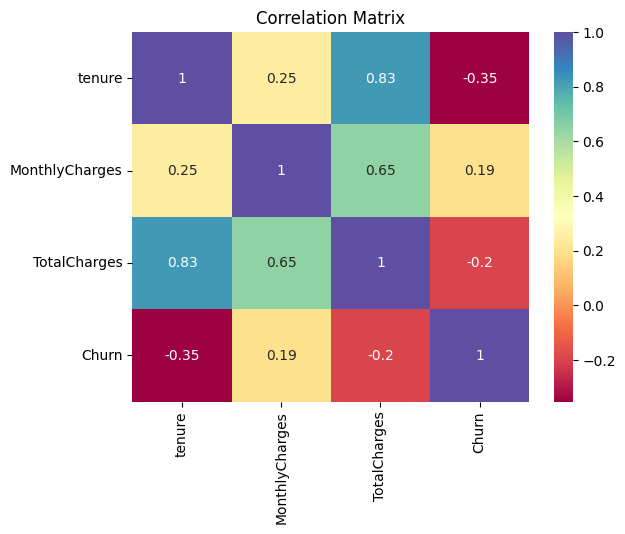

In [13]:
# correlation between numeric variables
telco_num = telco.select_dtypes(exclude = 'O')
sns.heatmap(telco_num.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')

- A strong positive correlation between tenure and total charges signfying high accumulated bills for long term customers.
- Another strong positive correlation between monthly charges and total charges. We can infer that mostly higher monthly charges leads to higher total charges which makes sense practically
- A weak positive correlation exist for the tenure and monthly charges


In [14]:
# Are there relationship between object dtypes and churn?
from tabulate import tabulate

categorical_cols = list(telco.select_dtypes(include=['object']).columns)

for column in categorical_cols[1:]: # leaving customerID column out
    temp = pd.crosstab(telco[column], telco.Churn, normalize='index').round(4)*100
    print(f"\nRelation between {column} and Churn".upper())
    print(tabulate(temp, headers='keys', tablefmt='presto'))


RELATION BETWEEN GENDER AND CHURN
 gender   |     0 |     1
----------+-------+-------
 Female   | 73.08 | 26.92
 Male     | 73.84 | 26.16

RELATION BETWEEN SENIORCITIZEN AND CHURN
   SeniorCitizen |     0 |     1
-----------------+-------+-------
               0 | 76.39 | 23.61
               1 | 58.32 | 41.68

RELATION BETWEEN PARTNER AND CHURN
 Partner   |     0 |     1
-----------+-------+-------
 No        | 67.04 | 32.96
 Yes       | 80.34 | 19.66

RELATION BETWEEN DEPENDENTS AND CHURN
 Dependents   |     0 |     1
--------------+-------+-------
 No           | 68.72 | 31.28
 Yes          | 84.55 | 15.45

RELATION BETWEEN PHONESERVICE AND CHURN
 PhoneService   |     0 |     1
----------------+-------+-------
 No             | 75.07 | 24.93
 Yes            | 73.29 | 26.71

RELATION BETWEEN MULTIPLELINES AND CHURN
 MultipleLines    |     0 |     1
------------------+-------+-------
 No               | 74.96 | 25.04
 No phone service | 75.07 | 24.93
 Yes              | 71.39 | 28.

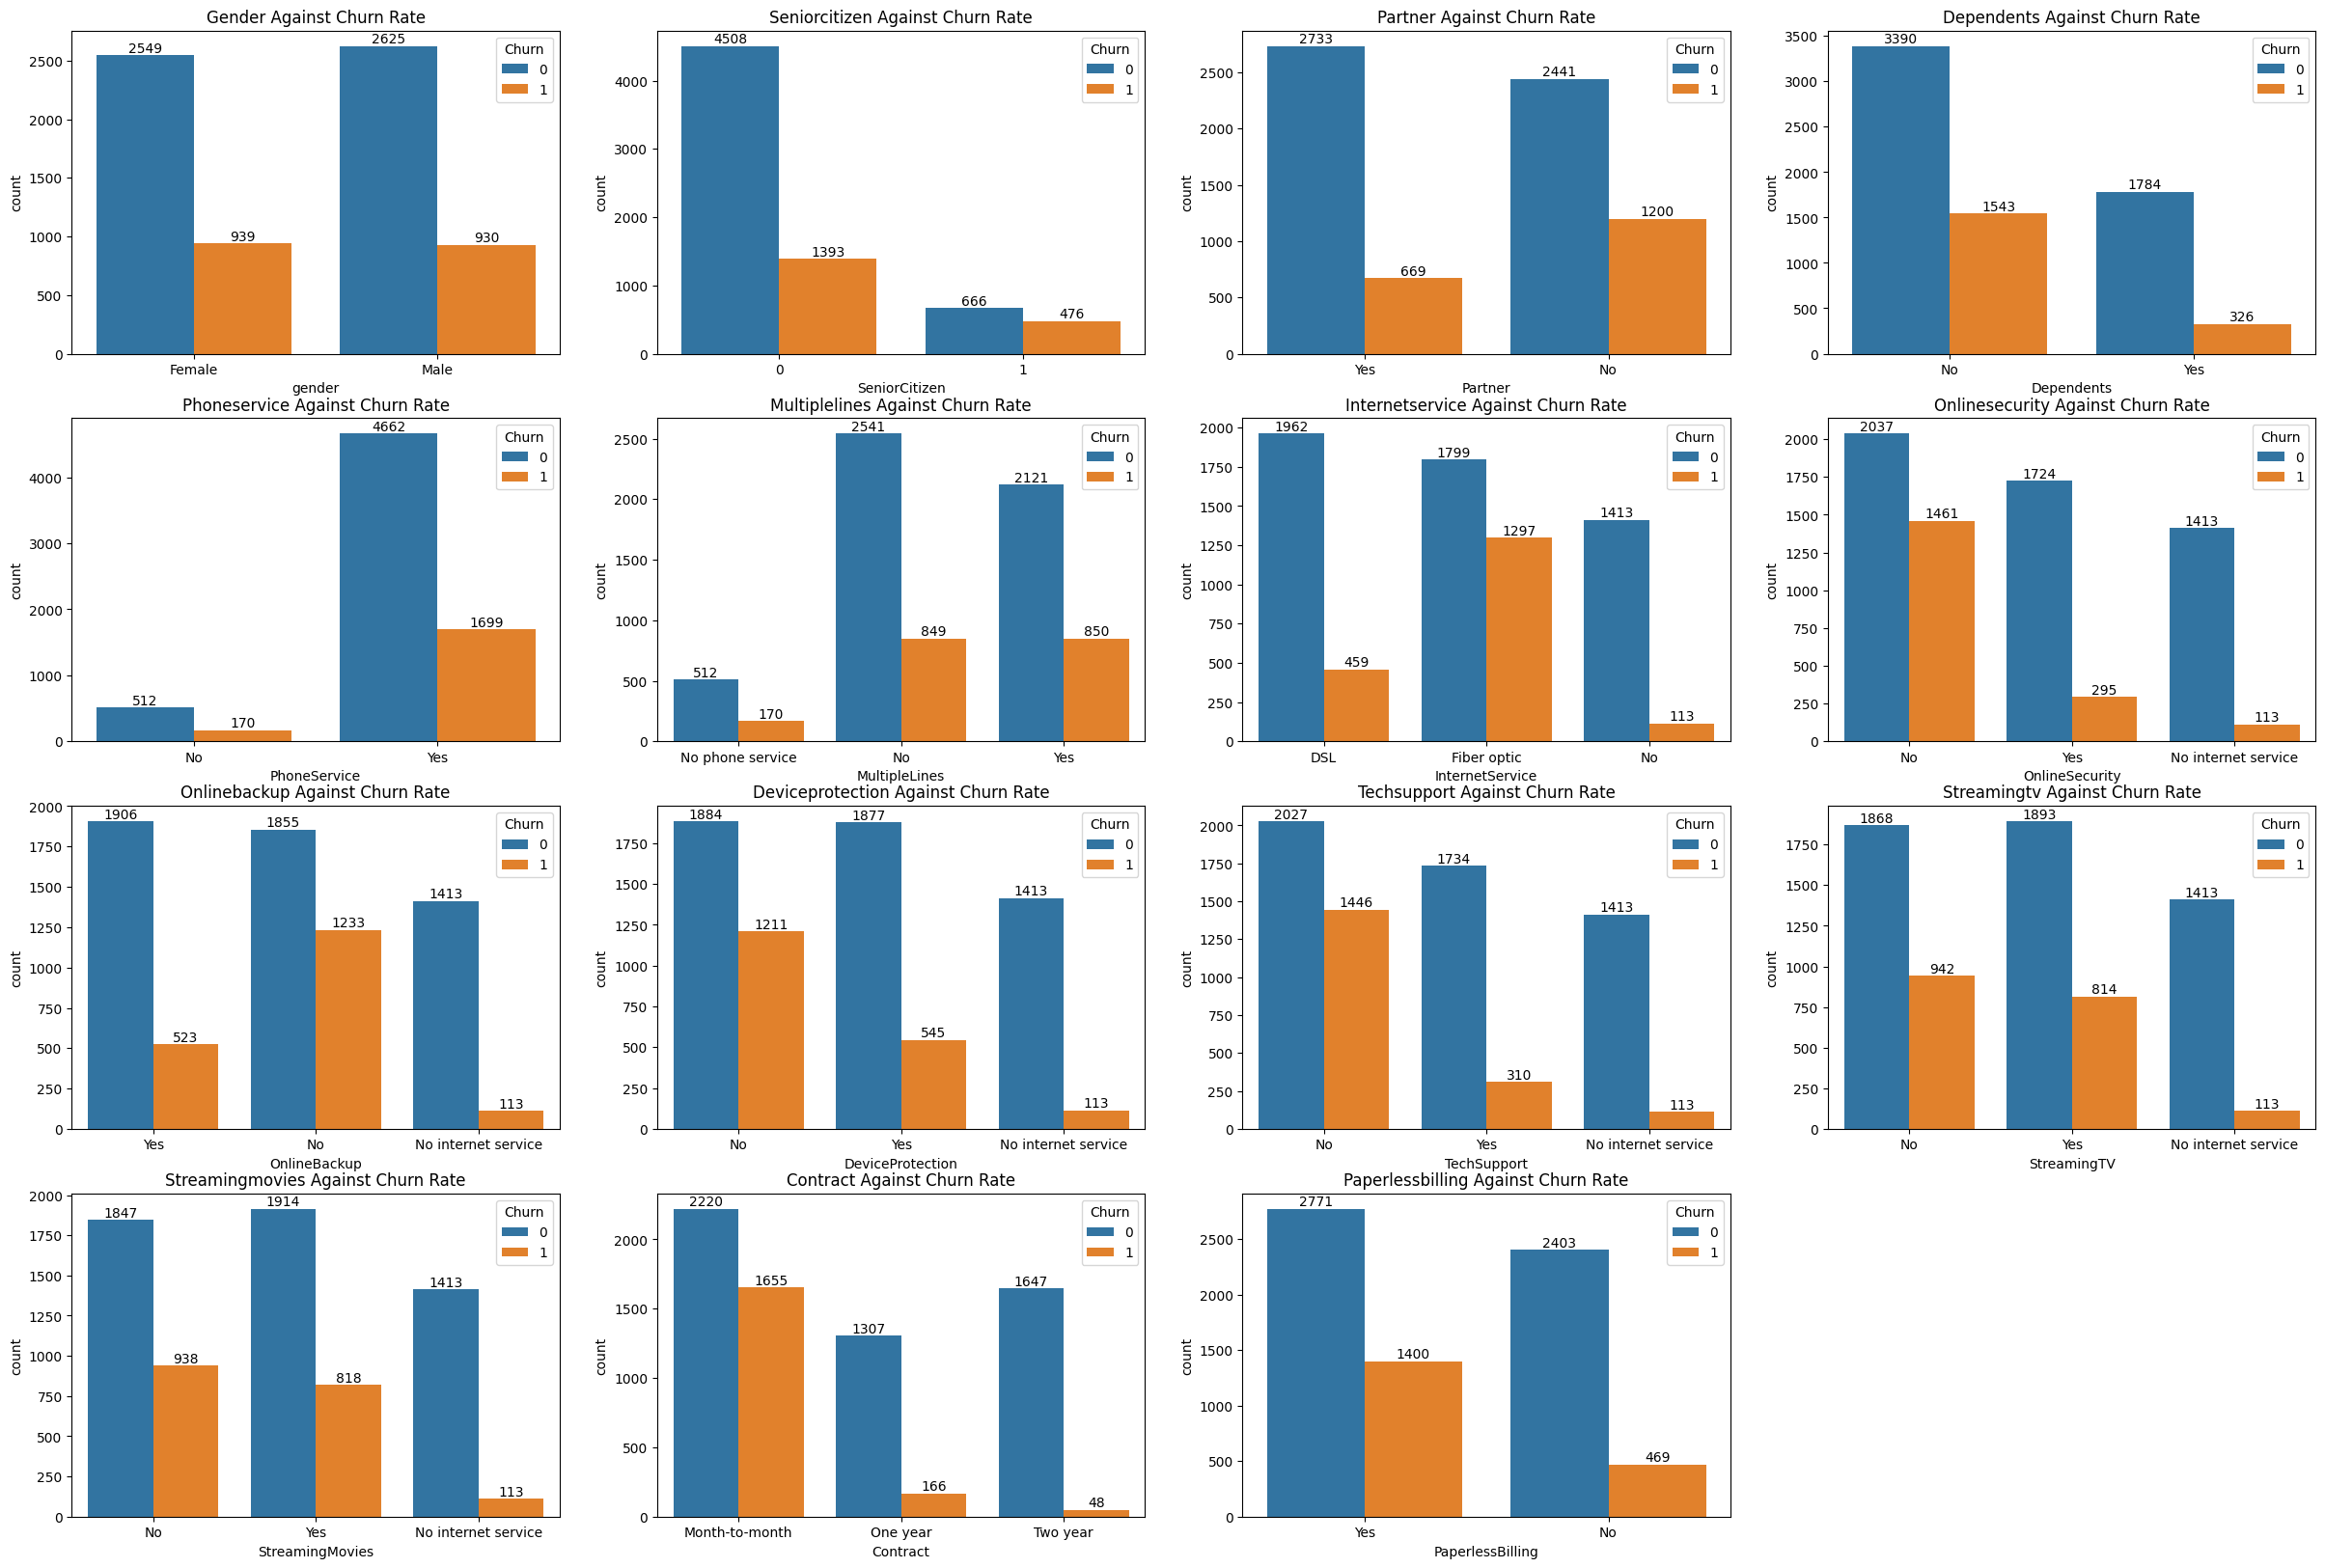

In [15]:
# graphical representation of the immediate above
categorical_cols = list(telco.select_dtypes(include=['object']).columns)
fig = plt.figure(figsize = (30,20))
i = 0
for column in categorical_cols[1:-1]:
    i += 1
    plt.subplot(4, 4, i)
    ax = sns.countplot(telco, x = column, hue = 'Churn')
    plt.title(f'{column.title()} Against Churn Rate')
    for container in ax.containers: # for loop to display the the count
        ax.bar_label(container)

plt.show()

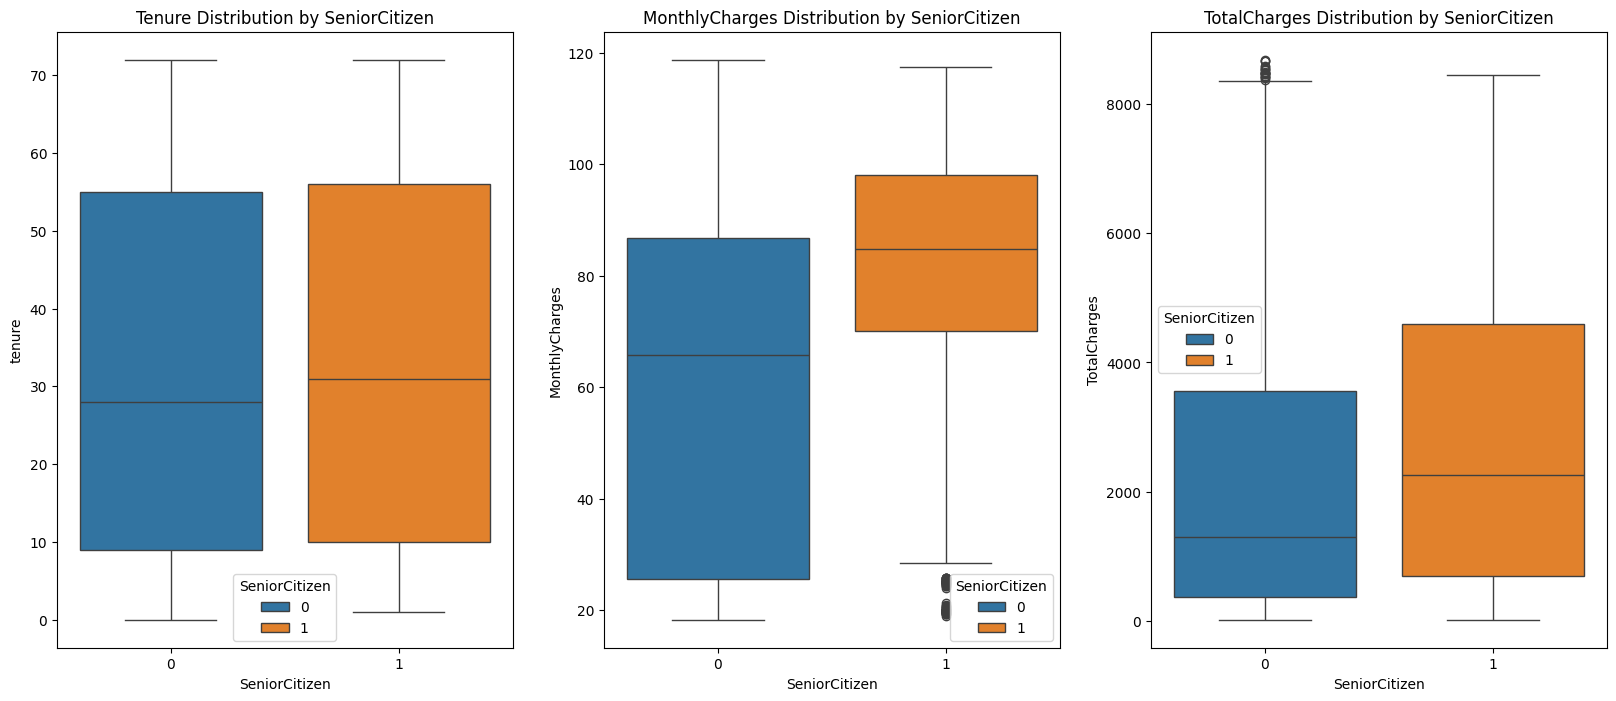

In [16]:
# Boxplot for SeniorCitizen vs Tenure
fig = plt.figure(figsize = (20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='SeniorCitizen', y='tenure', data=telco, hue='SeniorCitizen')
plt.title('Tenure Distribution by SeniorCitizen')


# Boxplot for SeniorCitizen vs MonthlyCharges
plt.subplot(1,3,2)
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', data=telco, hue = 'SeniorCitizen')
plt.title('MonthlyCharges Distribution by SeniorCitizen')


# Boxplot for SeniorCitizen vs TotalCharges
plt.subplot(1,3,3)
sns.boxplot(x='SeniorCitizen', y='TotalCharges', data=telco, hue = 'SeniorCitizen')
plt.title('TotalCharges Distribution by SeniorCitizen')
plt.show()

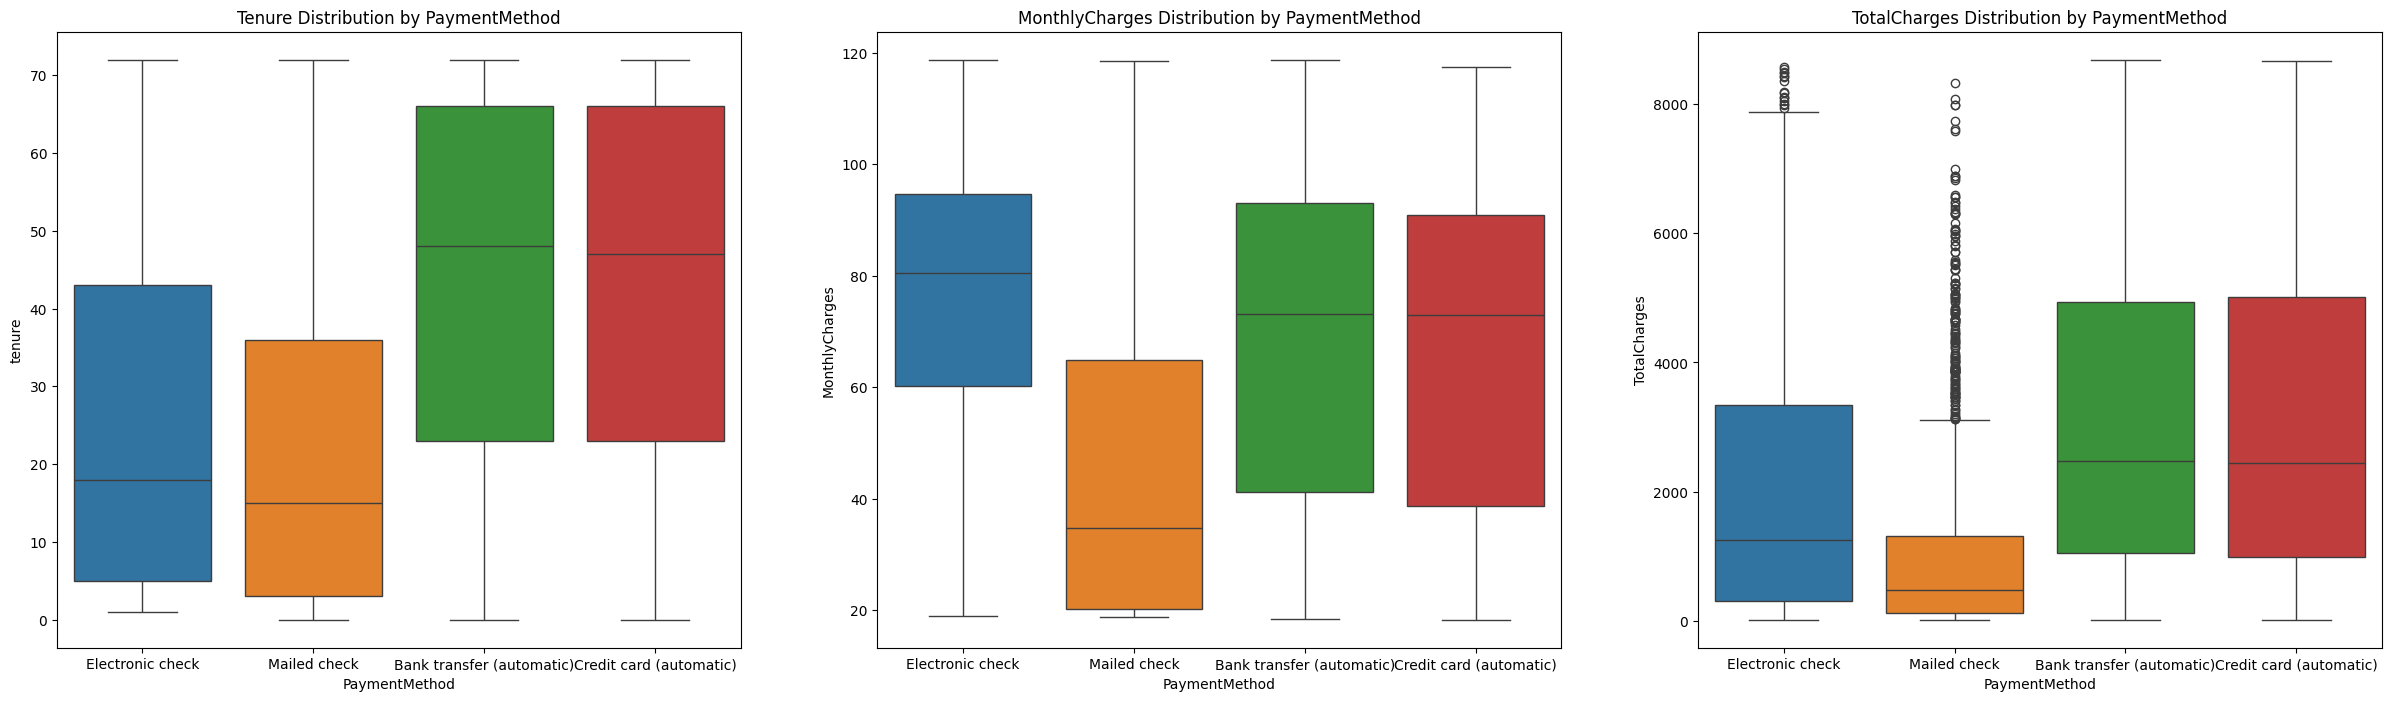

In [17]:
# Boxplot for PaymentMethod vs Tenure
fig = plt.figure(figsize = (30, 8))
plt.subplot(1,3,1)
sns.boxplot(x='PaymentMethod', y='tenure', data=telco, hue='PaymentMethod')
plt.title('Tenure Distribution by PaymentMethod')


# Boxplot for PaymentMethod vs MonthlyCharges
plt.subplot(1,3,2)
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=telco, hue = 'PaymentMethod')
plt.title('MonthlyCharges Distribution by PaymentMethod')


# Boxplot for PaymentMethod vs TotalCharges
plt.subplot(1,3,3)
sns.boxplot(x='PaymentMethod', y='TotalCharges', data=telco, hue = 'PaymentMethod')
plt.title('TotalCharges Distribution by PaymentMethod')
plt.show()

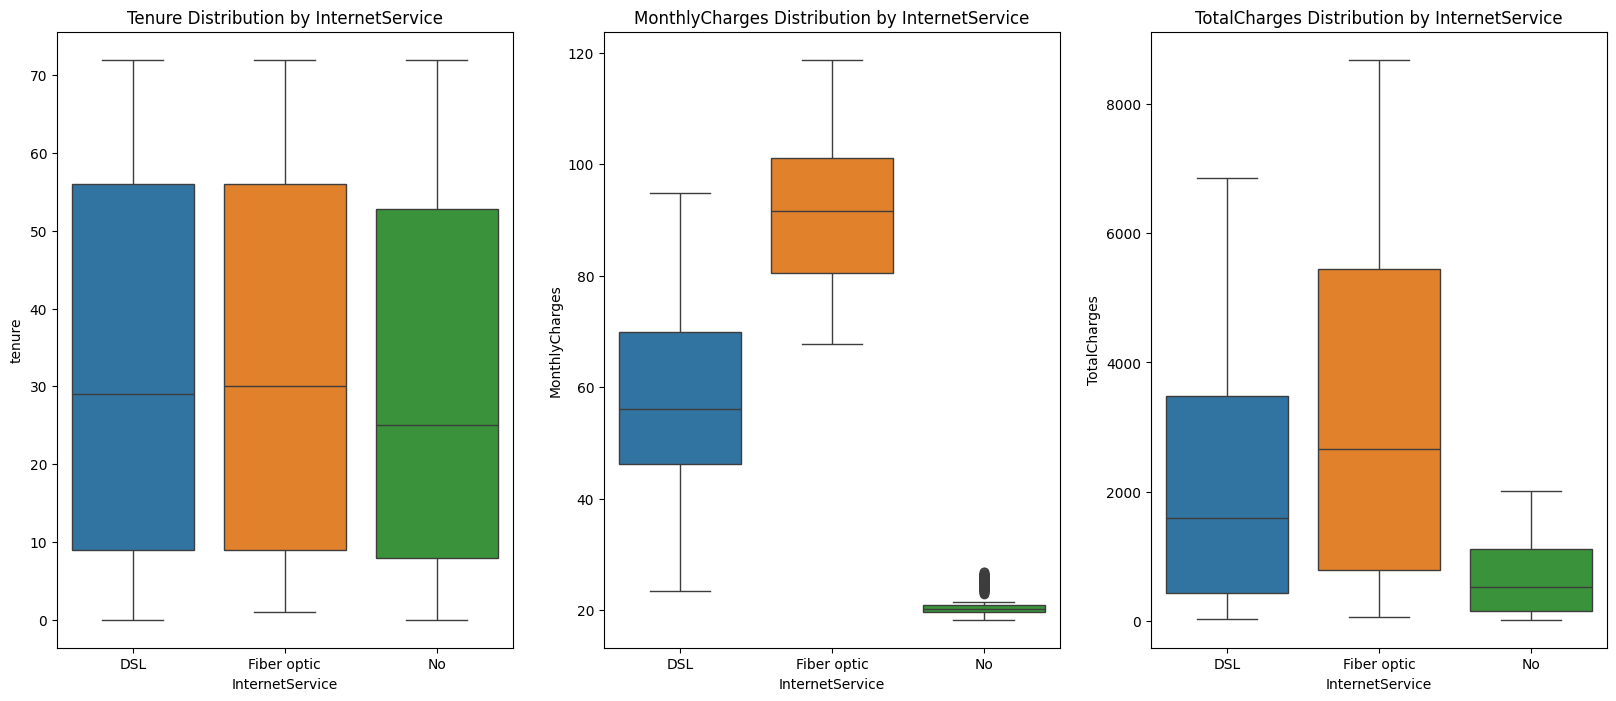

In [18]:
# Boxplot for InternetService vs Tenure
fig = plt.figure(figsize = (20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='InternetService', y='tenure', data=telco, hue='InternetService')
plt.title('Tenure Distribution by InternetService')


# Boxplot for InternetService vs MonthlyCharges
plt.subplot(1,3,2)
sns.boxplot(x='InternetService', y='MonthlyCharges', data=telco, hue = 'InternetService')
plt.title('MonthlyCharges Distribution by InternetService')


# Boxplot for InternetService vs TotalCharges
plt.subplot(1,3,3)
sns.boxplot(x='InternetService', y='TotalCharges', data=telco, hue = 'InternetService')
plt.title('TotalCharges Distribution by InternetService')
plt.show()

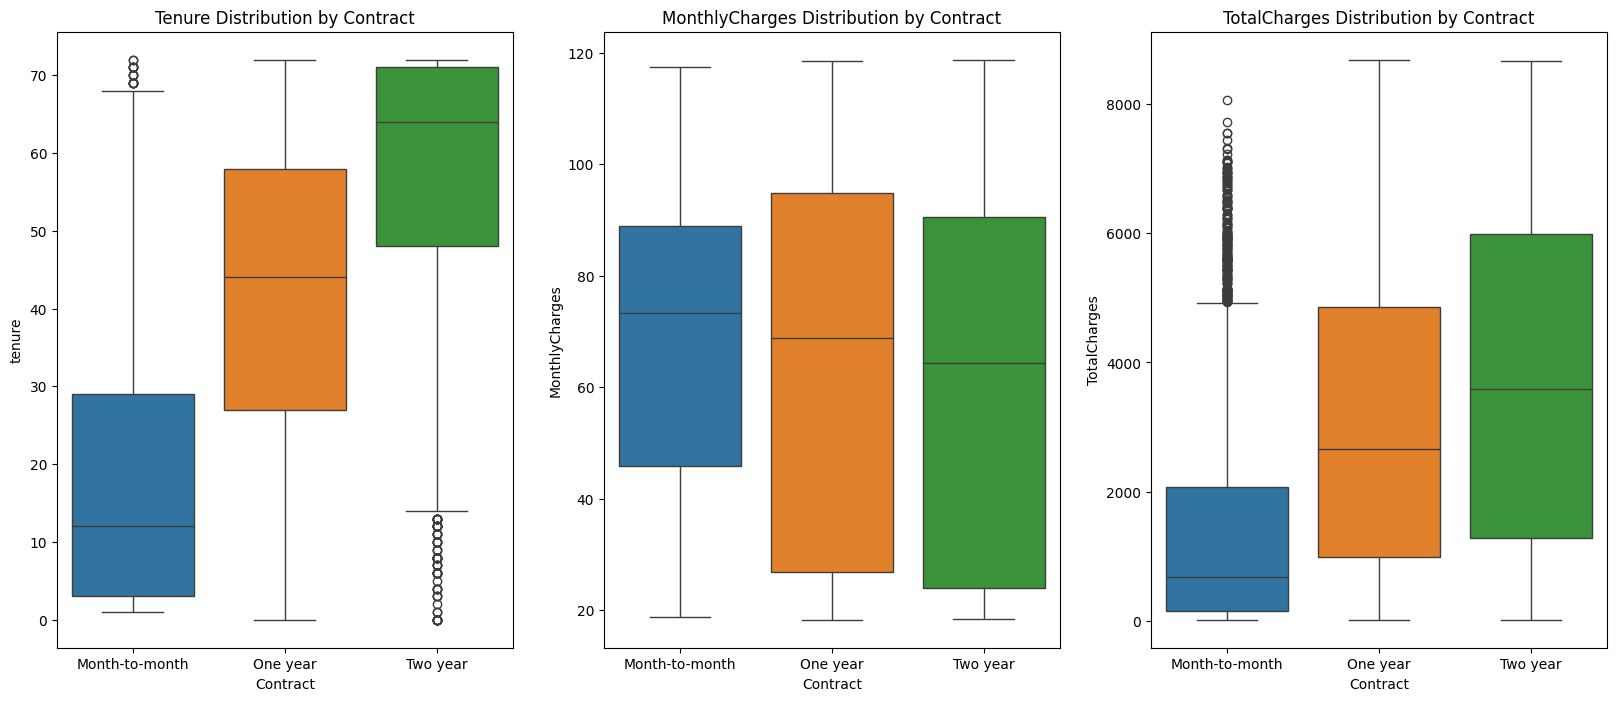

In [19]:
# Boxplot for Contract vs Tenure
fig = plt.figure(figsize = (20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='Contract', y='tenure', data=telco, hue='Contract')
plt.title('Tenure Distribution by Contract')


# Boxplot for Contract vs MonthlyCharges
plt.subplot(1,3,2)
sns.boxplot(x='Contract', y='MonthlyCharges', data=telco, hue = 'Contract')
plt.title('MonthlyCharges Distribution by Contract')


# Boxplot for Contract vs TotalCharges
plt.subplot(1,3,3)
sns.boxplot(x='Contract', y='TotalCharges', data=telco, hue = 'Contract')
plt.title('TotalCharges Distribution by Contract')
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

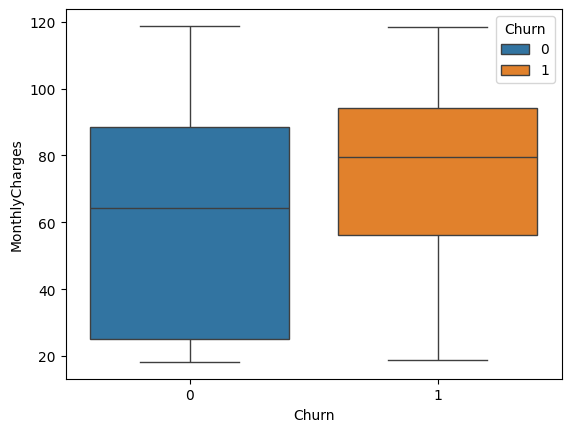

In [20]:
sns.boxplot(telco, x = 'Churn', y= 'MonthlyCharges', hue='Churn')

- Customers who are leaving are paying higher monthly charges on average

# Machine Learning

In [21]:
del telco['customerID']

In [22]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Splitting the dataset
- Training 80%
- Validation 10%
- Testing 10%

In [23]:
df_train_full, df_test = train_test_split(telco, test_size = 0.1, random_state = 18)
df_train, df_valid = train_test_split(df_train_full, test_size = 1/9, random_state = 18)

print(f'Training dataset {df_train.shape}')
print(f'Validation dataset {df_valid.shape}')
print(f'Testing dataset {df_test.shape}')

Training dataset (5633, 20)
Validation dataset (705, 20)
Testing dataset (705, 20)


In [24]:
# select target column
y_train = df_train['Churn'].values
y_valid = df_valid['Churn'].values
y_test = df_test['Churn'].values

In [25]:
# delete target columns from the rest of the dataframe
del df_train['Churn']
del df_valid['Churn']
del df_test['Churn']

In [26]:
# confirm deleted churn variable
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
573,Male,0,Yes,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),100.30,5614.45
821,Male,0,Yes,Yes,43,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.15,3566.60
4952,Male,0,No,No,2,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.50
7019,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00
6571,Female,0,No,No,34,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Mailed check,55.00,1885.15


# Feature Engineering

In [27]:
# convert dataframe into dict
train_dict = df_train.to_dict(orient = 'records')
train_valid = df_valid.to_dict(orient = 'records')

# train the vectorizer with train_dict (encoding)
dv = DictVectorizer()
dv.fit(train_dict)

# transform data into arrays
X_train = dv.transform(train_dict)
X_valid = dv.transform(train_valid)

print('Training Data Shape:',X_train.shape)
print('Validation Data Shape:',X_valid.shape)

Training Data Shape: (5633, 45)
Validation Data Shape: (705, 45)


# Training Models

LOGISTIC REGRESSION MODEL

Actual:    [0 0 0 0 1 1 0 0 1 1]
Predicted: [0 0 0 0 0 1 0 0 1 1]

Accuracy Score: 76.31% 

Recall Score: 0.47

Precision Score: 0.57

Specificity: 0.87

f1 Score: 0.52

Confusion Matrix:
 [[449  67]
 [100  89]]


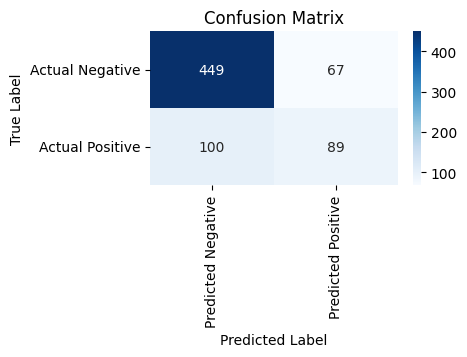

In [28]:
# using LOGISTIC REGRESSION algorithm
# instantiate the model
model_log = LogisticRegression(solver = 'liblinear', random_state = 18)
print('LOGISTIC REGRESSION MODEL\n')

# fit model/ algorithm with training data
model_log.fit(X_train, y_train)

# use model for prediction
y_valid_log = model_log.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_log[:10])

# compute accuracy score
acc_score_log = accuracy_score(y_valid, y_valid_log)
print(f'\nAccuracy Score: {round(acc_score_log * 100, 2)}% ')

recall_log = recall_score(y_valid, y_valid_log)
print(f'\nRecall Score: {round(recall_log,2)}')

precision_log = precision_score(y_valid, y_valid_log)
print(f'\nPrecision Score: {round(precision_log,2)}')

specificity_log = recall_score(y_valid, y_valid_log, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_log,2)}')

f1_log = f1_score(y_valid, y_valid_log)
print(f'\nf1 Score: {round(f1_log,2)}')

cm_log = confusion_matrix(y_valid, y_valid_log)
print('\nConfusion Matrix:\n', cm_log)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST CLASSIFIER MODEL

Actual:    [0 0 0 0 1 1 0 0 1 1]
Predicted: [0 0 0 0 0 1 0 0 0 1]

Accuracy Score: 76.17% 

Recall Score: 0.43

Precision Score: 0.57

Specificity: 0.88

f1 Score: 0.49

Confusion Matrix:
 [[455  61]
 [107  82]]


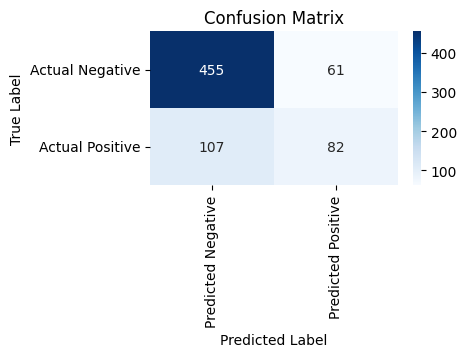

In [29]:
# using RANDOM FOREST CLASSIFIER algorithm
# instantiate the model
model_ran = RandomForestClassifier(n_estimators=150, random_state=18, criterion='entropy', n_jobs=-1)
print('RANDOM FOREST CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_ran.fit(X_train, y_train)

# use model for prediction
y_valid_ran = model_ran.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_ran[:10])

# compute accuracy score
acc_score_ran = accuracy_score(y_valid, y_valid_ran)
print(f'\nAccuracy Score: {round(acc_score_ran * 100, 2)}% ')

recall_ran = recall_score(y_valid, y_valid_ran)
print(f'\nRecall Score: {round(recall_ran,2)}')

precision_ran = precision_score(y_valid, y_valid_ran)
print(f'\nPrecision Score: {round(precision_ran,2)}')

specificity_ran = recall_score(y_valid, y_valid_ran, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_ran,2)}')

f1_ran = f1_score(y_valid, y_valid_ran)
print(f'\nf1 Score: {round(f1_ran,2)}')

cm_ran = confusion_matrix(y_valid, y_valid_ran)
print('\nConfusion Matrix:\n', cm_ran)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_ran, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

DECISION TREE CLASSIFIER MODEL

Actual:    [0 0 0 0 1 1 0 0 1 1]
Predicted: [1 0 0 0 0 0 0 0 1 1]

Accuracy Score: 70.92% 

Recall Score: 0.49

Precision Score: 0.46

Specificity: 0.79

f1 Score: 0.47

Confusion Matrix:
 [[408 108]
 [ 97  92]]


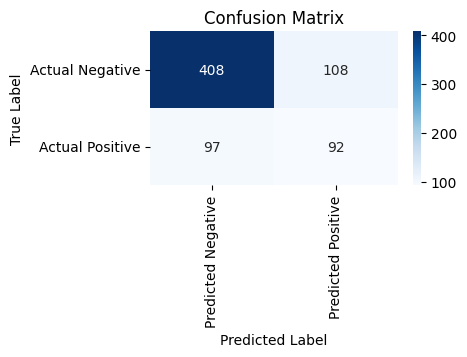

In [30]:
# using DECISION TREE CLASSIFIER algorithm
# instantiate the model
model_dec = DecisionTreeClassifier(random_state=18, criterion='entropy')
print('DECISION TREE CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_dec.fit(X_train, y_train)

# use model for prediction
y_valid_dec = model_dec.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_dec[:10])

# compute accuracy score
acc_score_dec = accuracy_score(y_valid, y_valid_dec)
print(f'\nAccuracy Score: {round(acc_score_dec * 100, 2)}% ')

recall_dec = recall_score(y_valid, y_valid_dec)
print(f'\nRecall Score: {round(recall_dec,2)}')

precision_dec = precision_score(y_valid, y_valid_dec)
print(f'\nPrecision Score: {round(precision_dec,2)}')

specificity_dec = recall_score(y_valid, y_valid_dec, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_dec,2)}')

f1_dec = f1_score(y_valid, y_valid_dec)
print(f'\nf1 Score: {round(f1_dec,2)}')

cm_dec = confusion_matrix(y_valid, y_valid_dec)
print('\nConfusion Matrix:\n', cm_dec)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_dec, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

ADABOOST CLASSIFIER MODEL

Actual:    [0 0 0 0 1 1 0 0 1 1]
Predicted: [0 0 0 0 0 1 0 0 1 1]

Accuracy Score: 76.6% 

Recall Score: 0.45

Precision Score: 0.58

Specificity: 0.88

f1 Score: 0.51

Confusion Matrix:
 [[455  61]
 [104  85]]


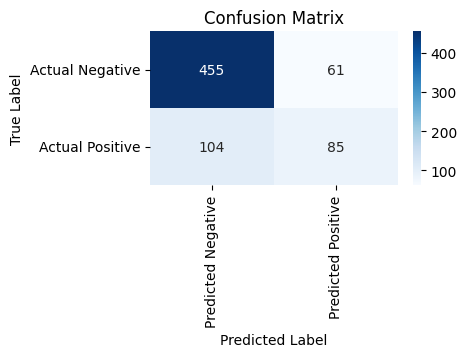

In [31]:
# using ADABOOST CLASSIFIER algorithm
# instantiate the model
model_ada = AdaBoostClassifier(n_estimators= 150,random_state=18, learning_rate= 0.9)
print('ADABOOST CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_ada.fit(X_train, y_train)

# use model for prediction
y_valid_ada = model_ada.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_ada[:10])

# compute accuracy score
acc_score_ada = accuracy_score(y_valid, y_valid_ada)
print(f'\nAccuracy Score: {round(acc_score_ada * 100, 2)}% ')

recall_ada = recall_score(y_valid, y_valid_ada)
print(f'\nRecall Score: {round(recall_ada,2)}')

precision_ada = precision_score(y_valid, y_valid_ada)
print(f'\nPrecision Score: {round(precision_ada,2)}')

specificity_ada = recall_score(y_valid, y_valid_ada, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_ada,2)}')

f1_ada = f1_score(y_valid, y_valid_ada)
print(f'\nf1 Score: {round(f1_ada,2)}')

cm_ada = confusion_matrix(y_valid, y_valid_ada)
print('\nConfusion Matrix:\n', cm_ada)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

GRADIENT BOOSTING CLASSIFIER MODEL

Actual:    [0 0 0 0 1 1 0 0 1 1]
Predicted: [0 0 0 0 1 0 0 0 1 1]

Accuracy Score: 74.04% 

Recall Score: 0.47

Precision Score: 0.52

Specificity: 0.84

f1 Score: 0.49

Confusion Matrix:
 [[433  83]
 [100  89]]


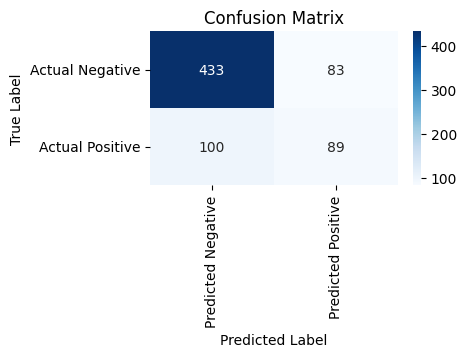

In [32]:
# using GRADIENT BOOSTING CLASSIFIER algorithm
# instantiate the model
model_grad = GradientBoostingClassifier(n_estimators= 150,random_state=18, learning_rate= 0.9)
print('GRADIENT BOOSTING CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_grad.fit(X_train, y_train)

# use model for prediction
y_valid_grad = model_grad.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_grad[:10])

# compute accuracy score
acc_score_grad = accuracy_score(y_valid, y_valid_grad)
print(f'\nAccuracy Score: {round(acc_score_grad * 100, 2)}% ')

recall_grad = recall_score(y_valid, y_valid_grad)
print(f'\nRecall Score: {round(recall_grad,2)}')

precision_grad = precision_score(y_valid, y_valid_grad)
print(f'\nPrecision Score: {round(precision_grad,2)}')

specificity_grad = recall_score(y_valid, y_valid_grad, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_grad,2)}')

f1_grad = f1_score(y_valid, y_valid_grad)
print(f'\nf1 Score: {round(f1_grad,2)}')

cm_grad = confusion_matrix(y_valid, y_valid_grad)
print('\nConfusion Matrix:\n', cm_grad)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_grad, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Saving Model

In [33]:
# import pickle library
import pickle

# specify where to save the file
with open('churn-model.bin', 'wb') as f_out:
    # save the model
    pickle.dump((dv, model_ada), f_out)

# Loading Model

In [34]:
with open('churn-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [35]:
## a sample customer
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'SeniorCitizen': 0,
 'Partner': 'no',
 'Dependents': 'no',
 'tenure': 41,
 'PhoneService': 'yes',
 'MultipleLines': 'no',
 'InternetService': 'dsl',
 'OnlineSecurity': 'yes',
 'OnlineBackup': 'no',
 'DeviceProtection': 'yes',
 'TechSupport': 'yes',
 'StreamingTV': 'yes',
 'StreamingMovies': 'yes',
 'Contract': 'one_year',
 'PaperlessBilling': 'yes',
 'PaymentMethod': 'bank_transfer_(automatic)',
 'MonthlyCharges': 79.85,
 'TotalCharges': 3320.75,
}

In [36]:
# create a function to make a single prediction
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_predict = model.predict(X)[0]
    return y_predict

In [37]:
# call the function to make the prediction
prediction = predict_single(customer, dv, model)
print(f'{prediction}')

0


In [38]:
# lets make the prediction by setting the threshold and returning a verdict
# 'verdict: Churn' , 'verdict: Not Churn'
if prediction == 1:
    print('Verdict: Churn')
else: print('Verdict: Not Churn')

Verdict: Not Churn
